In [2]:
#for data analysis
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to ignore warnings
import warnings
warnings.simplefilter('ignore')

#for modelling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df= pd.read_csv('covid19.csv')

In [4]:
df

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [5]:
df.head(3)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0


In [7]:
df.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


In [11]:
new_df=df.groupby(by="Date",sort=False)

In [13]:
print(new_df)

In [17]:
new_df.get_group("04/03/20").sum()

Sno                                                                       255
State/UnionTerritory        Uttar PradeshKeralaHaryanaDelhiTelenganaRajasthan
ConfirmedIndianNational                                                    12
ConfirmedForeignNational                                                   16
Cured                                                                       3
Deaths                                                                      0
dtype: object

In [30]:
df_drop=df.drop(columns=['Sno'])

In [37]:
sum=["ConfirmedIndianNational",'ConfirmedForeignNational','Cured','Deaths']
df_drop["sum_of_columns"]=df_drop[sum].sum(axis=1)

In [38]:
df_drop

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,sum_of_columns
0,30/01/20,Kerala,1,0,0,0,1
1,31/01/20,Kerala,1,0,0,0,1
2,01/02/20,Kerala,2,0,0,0,2
3,02/02/20,Kerala,3,0,0,0,3
4,03/02/20,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0,4
266,21/03/20,Ladakh,13,0,0,0,13
267,21/03/20,Uttar Pradesh,23,1,9,0,33
268,21/03/20,Uttarakhand,3,0,0,0,3


In [39]:
df_drop.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,sum_of_columns
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.551852,1.329630,0.603704,0.092593,7.577778
std,8.339625,3.587288,1.461522,0.290399,9.791482
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,3.000000
75%,6.000000,0.000000,0.000000,0.000000,10.750000
max,60.000000,14.000000,9.000000,1.000000,64.000000


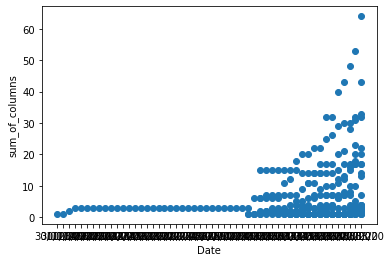

In [42]:
plt.scatter('Date','sum_of_columns',data=df_drop)
plt.xlabel('Date')
plt.ylabel('sum_of_columns')
plt.show()

In [46]:
new_df.get_group("04/03/20")

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
39,40,Uttar Pradesh,6,0,0,0
40,41,Kerala,3,0,3,0
41,42,Haryana,0,2,0,0
42,43,Delhi,1,0,0,0
43,44,Telengana,1,0,0,0
44,45,Rajasthan,1,14,0,0
